Title - Classifying Reuters dataset using deep neural network-multiclass classification problem.

Introduction:
Multiclass classification is a type of machine learning problem where the task is to classify instances into one of several classes. The Reuters dataset is a popular dataset used for text classification tasks, where each sample is a news article that belongs to one of multiple predefined categories.

Dataset:
The Reuters dataset contains a large collection of news articles, each labeled with a single category among multiple classes. The dataset is already preprocessed and tokenized, and we will load it using the tensorflow.keras.datasets.reuters module. The data will be split into training and testing sets.

Data Preprocessing:
Since neural networks require input data to have consistent dimensions, we need to preprocess the text data before feeding it into the model. We use the keras.preprocessing.sequence.pad_sequences function to ensure all the sequences have the same length (padding with zeros if necessary).

Model Architecture:
The deep neural network model we use for this multiclass classification task consists of the following layers:

Embedding Layer: The first layer is an Embedding layer that converts integer-encoded words into dense vectors of fixed size. The output dimension of the embedding layer is set to 16.
GlobalAveragePooling1D Layer: This layer takes the average of all word embeddings in each sequence, reducing the dimensionality of the data while retaining important information.
Dense Layers: Two fully connected Dense layers follow the pooling layer. The first one has 16 units with ReLU activation, which introduces non-linearity to the model. The second Dense layer has as many units as there are classes in the dataset, and it uses the sigmoid activation function for multiclass classification.
Model Compilation:
To train the model, we compile it with an appropriate optimizer and loss function. For multiclass classification, we use the Adam optimizer and the sparse_categorical_crossentropy loss function. The optimizer is responsible for updating the model's weights during training, while the loss function measures how well the model performs on the training data and guides the optimization process.

Model Training:
We train the model on the training data, using a batch size of 512 and 20 epochs. During training, the model learns to minimize the loss and improve its accuracy on the training set.

Model Evaluation:
After training, we evaluate the model's performance on the test set using the evaluate method. The results include the test loss and test accuracy.

Visualization:
We visualize the training and validation accuracy as well as the training and validation loss over epochs using matplotlib. This helps us to understand the model's performance and detect potential overfitting or underfitting.

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import imdb
import matplotlib.pyplot as plt

In [2]:
# Set up the dataset
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [3]:
# Convert the reviews to one-hot vectors
train_data = keras.preprocessing.sequence.pad_sequences(train_data, value=0, padding='post', maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data, value=0, padding='post', maxlen=256)

In [4]:
# Define the model
model = keras.Sequential([
    layers.Embedding(input_dim=10000, output_dim=16),
    layers.GlobalAveragePooling1D(),
    layers.Dense(units=16, activation='relu'),
    layers.Dense(units=1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 16)          160000    
                                                                 
 global_average_pooling1d (G  (None, 16)               0         
 lobalAveragePooling1D)                                          
                                                                 
 dense (Dense)               (None, 16)                272       
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [6]:
# Train the model
history = model.fit(train_data, train_labels, epochs=20, validation_split=0.2, batch_size=512)

Epoch 1/20
40/40 [==============================] - 2s 18ms/step - loss: 0.6910 - accuracy: 0.5526 - val_loss: 0.6869 - val_accuracy: 0.6394
Epoch 2/20
40/40 [==============================] - 1s 15ms/step - loss: 0.6797 - accuracy: 0.7225 - val_loss: 0.6687 - val_accuracy: 0.7532
Epoch 3/20
40/40 [==============================] - 1s 15ms/step - loss: 0.6530 - accuracy: 0.7754 - val_loss: 0.6323 - val_accuracy: 0.7832
Epoch 4/20
40/40 [==============================] - 1s 15ms/step - loss: 0.6069 - accuracy: 0.7957 - val_loss: 0.5800 - val_accuracy: 0.7976
Epoch 5/20
40/40 [==============================] - 1s 15ms/step - loss: 0.5475 - accuracy: 0.8194 - val_loss: 0.5207 - val_accuracy: 0.8148
Epoch 6/20
40/40 [==============================] - 1s 16ms/step - loss: 0.4848 - accuracy: 0.8449 - val_loss: 0.4666 - val_accuracy: 0.8332
Epoch 7/20
40/40 [==============================] - 1s 15ms/step - loss: 0.4278 - accuracy: 0.8607 - val_loss: 0.4210 - val_accuracy: 0.8484
Epoch 8/20
40

In [7]:
# Evaluate the model on the test set
results = model.evaluate(test_data, test_labels)
print(f"Test loss: {results[0]:.4f}")
print(f"Test accuracy: {results[1]:.4f}")

782/782 [==============================] - 1s 1ms/step - loss: 0.2939 - accuracy: 0.8797
Test loss: 0.2939
Test accuracy: 0.8797


In [8]:
# Plot the accuracy and loss over epochs
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(accuracy) + 1)

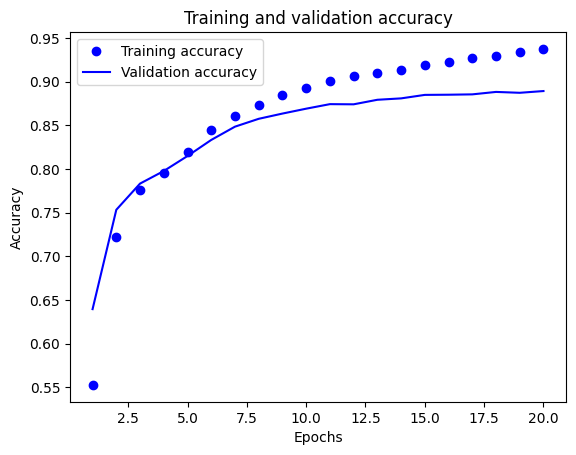

In [9]:
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

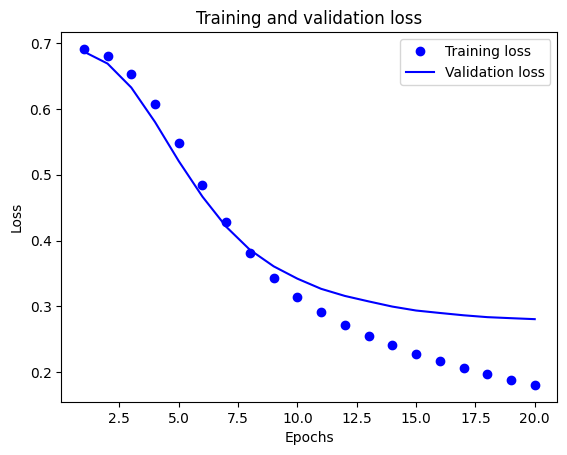

In [10]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()